### Import dependencies

In [23]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

### Load data

In [7]:
base_dir = "data/"

train_dir = os.path.join(base_dir, "stage1_train")
train_ids = [path for path in os.listdir(train_dir)]

# Dictionary mappings from IDs to images and masks
# find . -name "*.DS_Store" -type f -delete
train_imgs = dict(
    [(ID, os.listdir(os.path.join(train_dir, ID, "images"))[0]) for ID in train_ids]
)
train_masks = dict(
    [(ID, os.listdir(os.path.join(train_dir, ID, "masks"))) for ID in train_ids]
)
msk_cnt = 0
for msk in train_masks.values():
    msk_cnt += len(msk)

test_dir = os.path.join(base_dir, "stage1_test")
test_ids = [path for path in os.listdir(test_dir)]
test_imgs = dict(
    [(ID, os.listdir(os.path.join(test_dir, ID, "images"))[0]) for ID in test_ids]
)

print("Number of train images: {}".format(len(train_imgs)))
print("Number of train masks: {}".format(msk_cnt))
print("Number of test images: {}".format(len(test_imgs)))

Number of train images: 670
Number of train masks: 29461
Number of test images: 65


In [9]:
def load_img_shapes(path_to_img):
    return cv2.imread(path_to_img).shape


def load_img(path_to_img):
    return cv2.imread(path_to_img)

In [14]:
sample_img_id = train_ids[0]
sample_img_path = os.path.join(
    train_dir, sample_img_id, "images", train_imgs[sample_img_id]
)
sample_msk_path = os.listdir(os.path.join(train_dir, sample_img_id, "masks"))[:8]

Text(0.5, 1.0, '5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856.png')

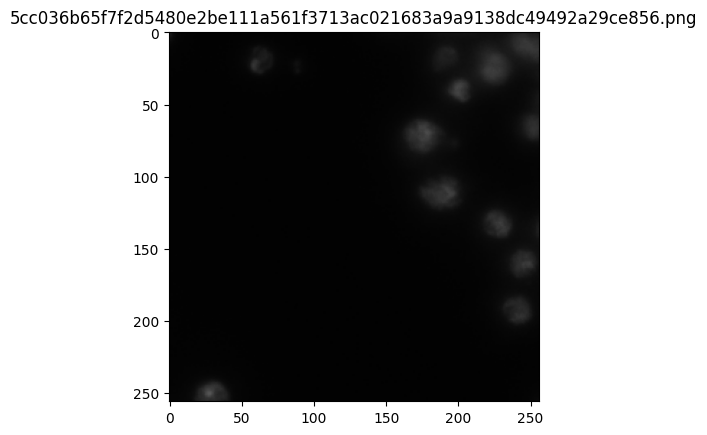

In [15]:
# Load image
img = load_img(sample_img_path)

# Plot image
plt.imshow(img)
plt.title(train_imgs[sample_img_id])

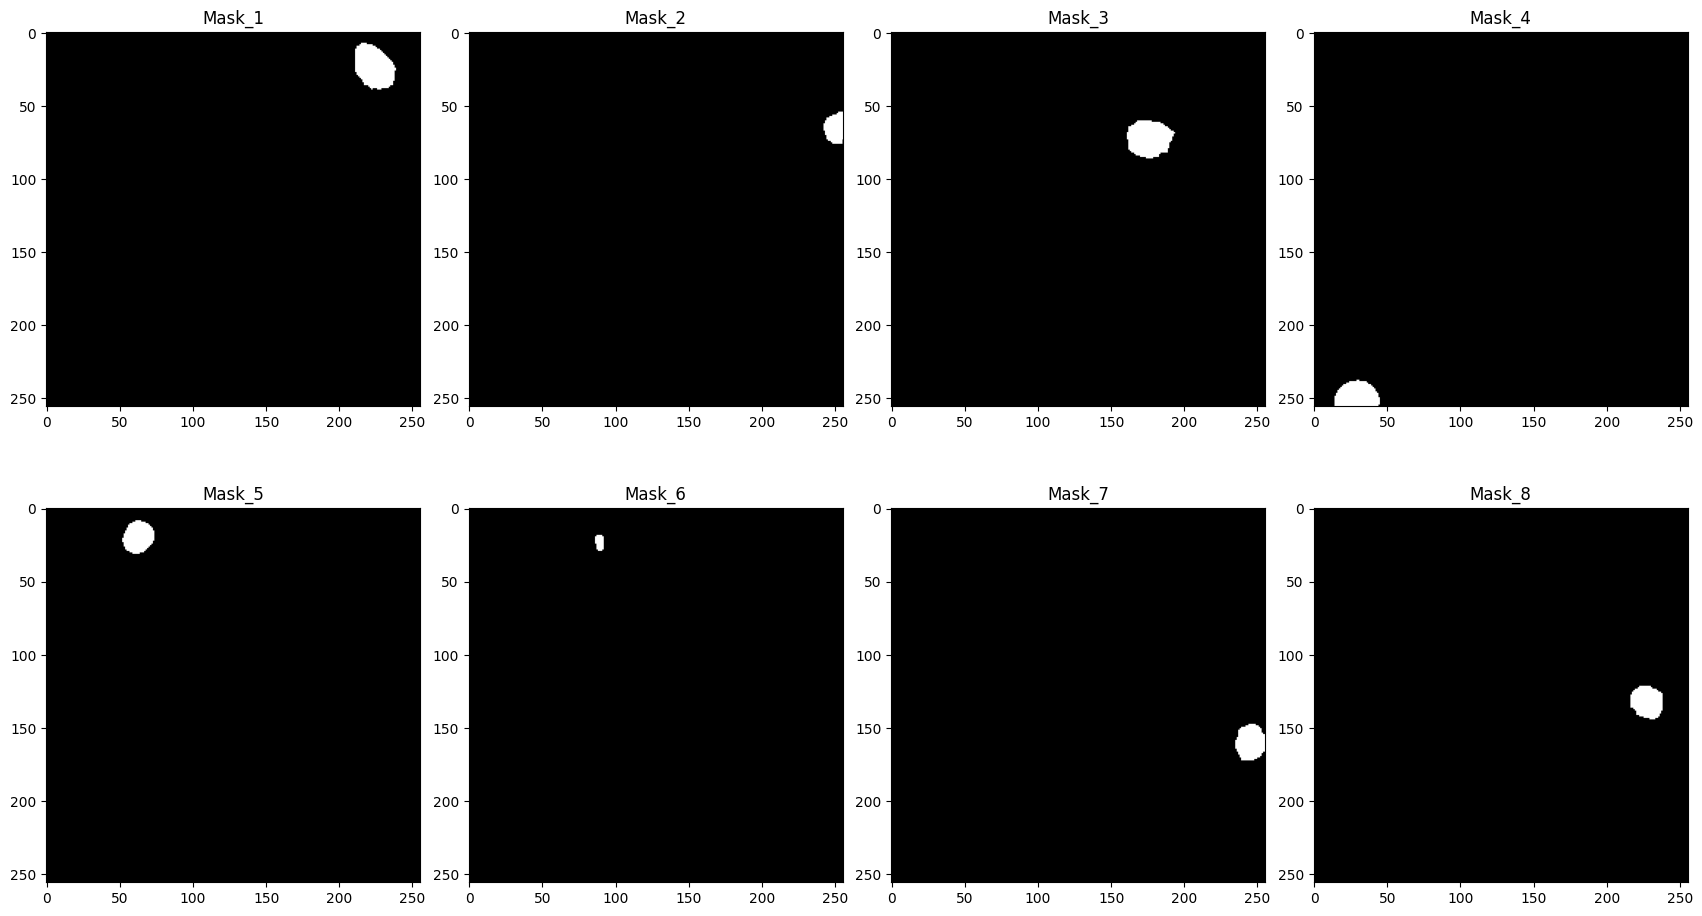

In [19]:
# Plot masks
plt.figure(figsize=(17, 10))
rows = 4
img_per_row = len(sample_msk_path) // rows
for i in range(len(sample_msk_path)):
    mask = load_img(os.path.join(train_dir, sample_img_id, "masks", sample_msk_path[i]))
    plt.subplot(img_per_row, rows, i + 1)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.imshow(mask)
    plt.title("Mask_" + str(i + 1))
plt.show()

In [31]:
# Distribution of image sizes in both datasets
train_shapes = []
test_shapes = []

for i in range(len(train_imgs)):
    img_id = train_ids[i]
    img_path = os.path.join(train_dir, img_id, "images", train_imgs[img_id])
    train_shapes.append(load_img_shapes(img_path))

for i in range(len(test_imgs)):
    img_id = test_ids[i]
    img_path = os.path.join(test_dir, img_id, "images", test_imgs[img_id])
    test_shapes.append(load_img_shapes(img_path))

df_train = pd.DataFrame({"shapes": train_shapes})
train_counts = df_train["shapes"].value_counts()
df_test = pd.DataFrame({"shape": test_shapes})
test_counts = df_test["shape"].value_counts()
print("Training Image Shapes:")
for i in range(len(train_counts)):
    print("Shape %s counts: %d" % (train_counts.index[i], train_counts.values[i]))
print("\nTest Image Shapes:")
for i in range(len(test_counts)):
    print("Shape %s counts: %d" % (test_counts.index[i], test_counts.values[i]))

Training Image Shapes:
Shape (256, 256, 3) counts: 334
Shape (256, 320, 3) counts: 112
Shape (520, 696, 3) counts: 92
Shape (360, 360, 3) counts: 91
Shape (1024, 1024, 3) counts: 16
Shape (512, 640, 3) counts: 13
Shape (603, 1272, 3) counts: 6
Shape (260, 347, 3) counts: 5
Shape (1040, 1388, 3) counts: 1

Test Image Shapes:
Shape (256, 256, 3) counts: 24
Shape (512, 680, 3) counts: 8
Shape (512, 640, 3) counts: 8
Shape (520, 696, 3) counts: 4
Shape (519, 253, 3) counts: 4
Shape (524, 348, 3) counts: 4
Shape (260, 347, 3) counts: 4
Shape (520, 348, 3) counts: 4
Shape (519, 161, 3) counts: 2
Shape (519, 162, 3) counts: 2
Shape (390, 239, 3) counts: 1


### Reference

- https://www.kaggle.com/code/enerrio/data-exploration-distribution-of-image-sizes